<a href="https://colab.research.google.com/github/Akashkunwar/Dscourses/blob/main/Guvi/Assignment/Task%204/Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assessment

###### I am going to provide two .csv files , you are supposed to work on them and have to provide solutions to the following problems

###### import necessary libraries

In [1]:
import pandas as pd
import plotly.express as px

In [2]:
collage_1 = pd.read_csv("https://raw.githubusercontent.com/Akashkunwar/Dscourses/main/Guvi/Assignment/Task%204/college_1.csv")
collage_2 = pd.read_csv("https://raw.githubusercontent.com/Akashkunwar/Dscourses/main/Guvi/Assignment/Task%204/college_2.csv")
collage_1[['python','mysql']] = collage_1[['python','mysql']].astype(int)

In [3]:
collage_1.head()

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising
0,A.Dharani,82,20,24500,24500,Computer Science and Engineering,0
1,V.JEEVITHA,82,20,21740,21740,Computer Science and Engineering,0
2,HEMAVATHI.R,100,100,19680,19680,Computer Science and Engineering,0
3,Mugunthan S,100,47,10610,10610,Computer Science and Engineering,0
4,Sathammai.S,100,8,8980,8980,Computer Science and Engineering,0


In [4]:
collage_2.head()

,Name,python,python_en,mysql,computational_thinking,Previous Geekions,CodeKata Score,Department,Rising
0,ASHOK KUMAR K,100,0,31,9,19400,19400,Electronics and Electrical Engineering,0
1,Chandru,0,20,0,0,14150,14490,Computer Science and Engineering,340
2,Ganesh Ramkumar R,-1,55,24,6,8790,10790,Computer Science and Engineering,2000
3,Bodipudi Harini,-1,0,35,-1,10040,10040,Electronics and Communication Engineering,0
4,VIINU V P,-1,100,24,-1,9150,9150,Electronics and Electrical Engineering,0


###### merge those two csv files (after getting as dataframes, get them as a single dataframe)

In [5]:
df = collage_1.merge(collage_2, on=["Name","python","mysql","Previous Geekions","CodeKata Score","Department","Rising"],how='outer')
df = df.fillna(0)
df = df[['Name', 'python', 'python_en', 'mysql', 'computational_thinking', 'Previous Geekions', 'CodeKata Score','Department', 'Rising']]
df[['python_en','computational_thinking']] = df[['python_en','computational_thinking']].astype(int)
df.head()

,Name,python,python_en,mysql,computational_thinking,Previous Geekions,CodeKata Score,Department,Rising
0,A.Dharani,82,0,20,0,24500,24500,Computer Science and Engineering,0
1,V.JEEVITHA,82,0,20,0,21740,21740,Computer Science and Engineering,0
2,HEMAVATHI.R,100,0,100,0,19680,19680,Computer Science and Engineering,0
3,Mugunthan S,100,0,47,0,10610,10610,Computer Science and Engineering,0
4,Sathammai.S,100,0,8,0,8980,8980,Computer Science and Engineering,0


###### Take each csv file , split that csv file into multiple categories (example csv files are added in the repo) 


###### consider if the codekata score exceeds 15000 points(present week) then make a csv on those observations as Exceeded expectations.csv


###### if  10000<codekata score<15000   (Reached_expectations.csv)



###### if  7000<codekata score<10000   (Needs_Improvement.csv)


###### if  codekate score < 7000        (Unsatisfactory.csv)

In [6]:
df[df["CodeKata Score"]>15000].to_csv("Exceeded_expectations.csv")
df[df["CodeKata Score"]>10000][df[df["CodeKata Score"]>10000]["CodeKata Score"]<15000].to_csv("Reached_expectations.csv")
df[df["CodeKata Score"]>7000][df[df["CodeKata Score"]>7000]["CodeKata Score"]<10000].to_csv("Needs_Improvement.csv")
df[df["CodeKata Score"]<7000].to_csv("Unsatisfactory.csv")

###### Average of previous week geekions vs this week geekions (i.e Previous Geekions vs CodeKata Score)

In [7]:
previous_week = df["Previous Geekions"].mean()
this_week = df["CodeKata Score"].mean()
print(f"Average of previous week geekions is : {previous_week} and this week geekions is : {this_week}")

Average of previous week geekions is : 3842.3529411764707 and this week geekions is : 4051.764705882353


###### No of students participated 

In [8]:
print("No of students participated is : ",df["Name"].count())

No of students participated is :  119


###### Average completion of python course or my_sql or python english or computational thinking

In [9]:
df[["python","python_en","mysql","computational_thinking"]].mean()

python                    54.344538
python_en                  8.722689
mysql                     23.478992
computational_thinking     0.647059
dtype: float64

###### rising star of the week (top 3 candidate who performed well in that particular week)

In [10]:
df.sort_values("Rising", ascending=False).head(3)

,Name,python,python_en,mysql,computational_thinking,Previous Geekions,CodeKata Score,Department,Rising
92,shifak N,58,0,0,0,5180,8320,Electronics and Electrical Engineering,3140
102,Narasimhan Y L,-1,-1,0,0,4800,6800,Computer Science and Engineering,2000
86,Ganesh Ramkumar R,-1,55,24,6,8790,10790,Computer Science and Engineering,2000


###### Shining stars of the week (top 3 candidates who has highest geekions)

In [11]:
df.sort_values("CodeKata Score", ascending=False).head(3)

,Name,python,python_en,mysql,computational_thinking,Previous Geekions,CodeKata Score,Department,Rising
0,A.Dharani,82,0,20,0,24500,24500,Computer Science and Engineering,0
1,V.JEEVITHA,82,0,20,0,21740,21740,Computer Science and Engineering,0
2,HEMAVATHI.R,100,0,100,0,19680,19680,Computer Science and Engineering,0


###### Department wise codekata performence (pie chart)

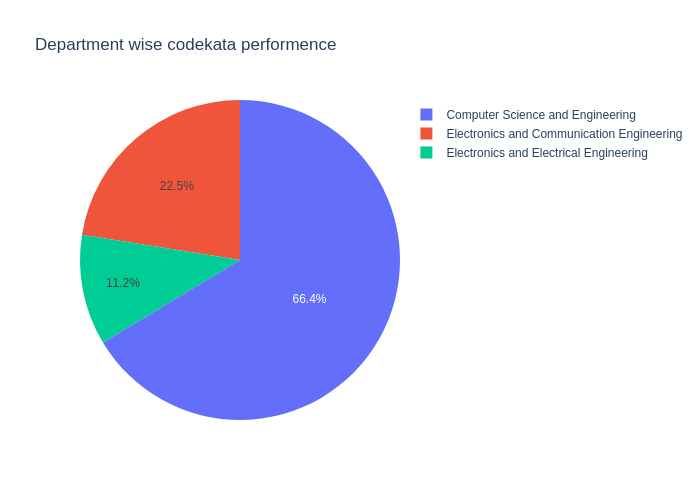

In [12]:
fig = px.pie(df, values='CodeKata Score', names='Department', title='Department wise codekata performence')
# fig.show() #To see intractive chart remove comment tag.
fig.show('png') #The embeded graph generated by plotly can't be seen in Github that's why I converted and show that in form of png.

###### Department wise toppers (horizantal bar graph or any visual representations of your choice)

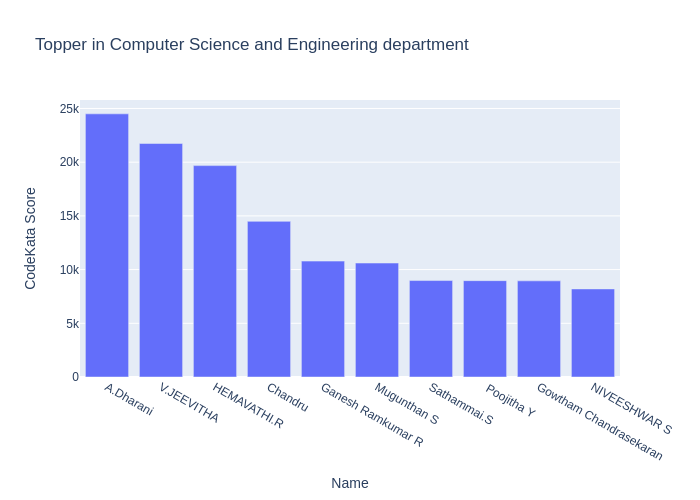

In [13]:
cse = df[df["Department"]=='Computer Science and Engineering'].sort_values("CodeKata Score", ascending=False).head(10)
fig = px.bar(cse, x="Name", y ="CodeKata Score", title = "Topper in Computer Science and Engineering department")
# fig.show()
fig.show('png')

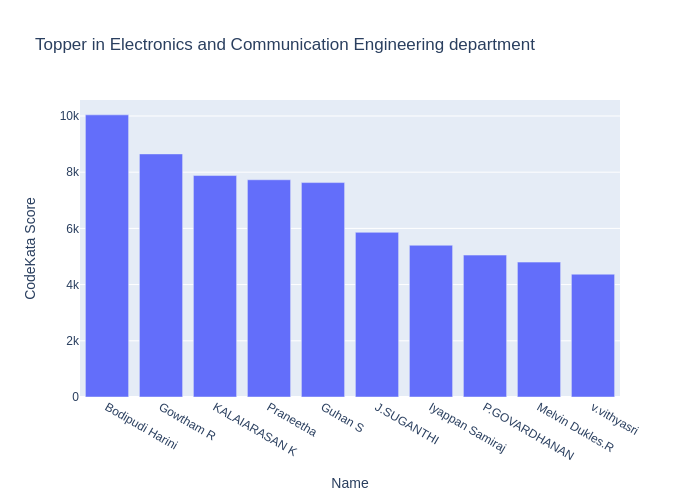

In [14]:
ece = df[df["Department"]=='Electronics and Communication Engineering'].sort_values("CodeKata Score", ascending=False).head(10)
fig = px.bar(ece, x="Name", y ="CodeKata Score", title = "Topper in Electronics and Communication Engineering department")
# fig.show()
fig.show('png')

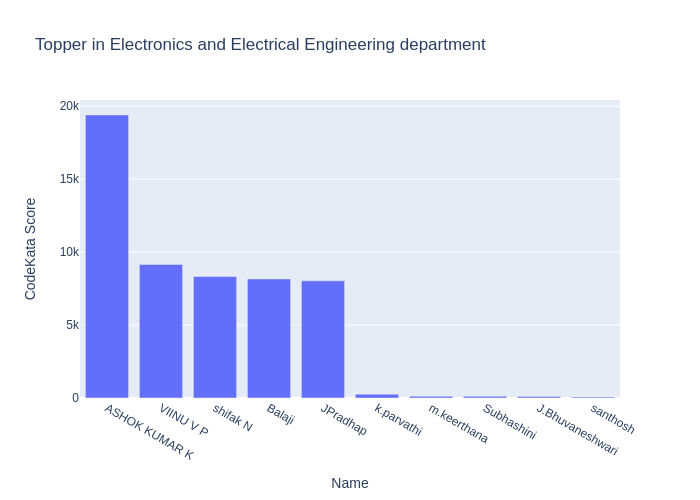

In [15]:
eee = df[df["Department"]=='Electronics and Electrical Engineering'].sort_values("CodeKata Score", ascending=False).head(10)
fig = px.bar(eee, x="Name", y ="CodeKata Score", title = "Topper in Electronics and Electrical Engineering department")
# fig.show()
fig.show('png')